<a href="https://colab.research.google.com/github/Savaliyaniks1/Project_4/blob/main/Mobile_Price_Prediction_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING MOBILE PRICES

 ## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

## Extracting Data

In [4]:
data = pd.read_csv(r"/content/Processed_Flipdata - Processed_Flipdata.csv")

In [5]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [6]:
## Show shape of the data

data.shape

(541, 12)

### Data has 541 rows and 12 columns

In [7]:
## Set unnamed:0 columns as index.

data = data.set_index("Unnamed: 0")
print(data.shape)

(541, 11)


In [8]:
## Show data after set unnamed:0 column as index

data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
Unnamed: 0,,,,,,,,,,,
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


# Data Cleaning

## Missing Values

In [9]:
data.isnull().sum()   ## We observe that the data has no missing values.

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [10]:
## Checking data types of the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 642
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 50.7+ KB


In [11]:
## get the unique value of each columns and it's Length

features = data.columns

for i in features :
    print("""unique value of {}\n{}\nlen is {} \n............\n
    """.format(i,data[i].unique(),len(data[i].unique())))

unique value of Model
['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'microma

In [12]:
# Remove duplicate rows

data_no_duplicates = data.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(data_no_duplicates)


DataFrame after removing duplicates:
                            Model          Colour  Memory  RAM  Battery_  \
Unnamed: 0                                                                 
0                 Infinix SMART 7     Night Black      64    4      6000   
1                 Infinix SMART 7      Azure Blue      64    4      6000   
2                    MOTOROLA G32    Mineral Gray     128    8      5000   
3                        POCO C50      Royal Blue      32    2      5000   
4                 Infinix HOT 30i        Marigold     128    8      5000   
...                           ...             ...     ...  ...       ...   
637         SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
638                      LAVA Z21            Cyan      32    2      3100   
639                Tecno Spark 8T  Turquoise Cyan      64    4      5000   
641         SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
642                      OPPO A77        Sky Blue 

In [13]:
## After duplicate value removing check shape of the data.

data_no_duplicates.shape

(531, 11)

In [14]:
data_no_duplicates.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
Unnamed: 0,,,,,,,,,,,
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [15]:
# Convert the specified columns to int

# Remove commas and convert to numeric

data_no_duplicates["Prize"] = data_no_duplicates["Prize"].str.replace(',', '').astype(int)

print("\nDataFrame after converting multiple columns:")
print(data_no_duplicates)
print("\nData Types after converting multiple columns:")
print(data_no_duplicates.dtypes)


DataFrame after converting multiple columns:
                            Model          Colour  Memory  RAM  Battery_  \
Unnamed: 0                                                                 
0                 Infinix SMART 7     Night Black      64    4      6000   
1                 Infinix SMART 7      Azure Blue      64    4      6000   
2                    MOTOROLA G32    Mineral Gray     128    8      5000   
3                        POCO C50      Royal Blue      32    2      5000   
4                 Infinix HOT 30i        Marigold     128    8      5000   
...                           ...             ...     ...  ...       ...   
637         SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
638                      LAVA Z21            Cyan      32    2      3100   
639                Tecno Spark 8T  Turquoise Cyan      64    4      5000   
641         SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
642                      OPPO A77        S

<ipython-input-15-f3b35ff05233>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates["Prize"] = data_no_duplicates["Prize"].str.replace(',', '').astype(int)


In [16]:
## After remove commas value in "Prize" column.

data_no_duplicates.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
Unnamed: 0,,,,,,,,,,,
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


# Data visualization

In [17]:
## drop object type _columns
numerical_data = data_no_duplicates.select_dtypes(include = ['int64','float64']).columns
print("total number of numerical_data:",numerical_data.shape[0])

print("numerical_data column names:",numerical_data.tolist())

total number of numerical_data: 6
numerical_data column names: ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']


In [18]:
## drop object type _columns
cat_features = data_no_duplicates.select_dtypes(include = ['object']).columns
print("total number of cat_features:",cat_features.shape[0])

print("cat_features names:",cat_features.tolist())

total number of cat_features: 5
cat_features names: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


# Bivariate Analysis

In [19]:
## show correlation of the data

# Select numerical columns and create a DataFrame
numerical_df = data_no_duplicates[numerical_data]

# Calculate and display the correlation matrix
numerical_df.corr()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
Memory,1.000000,0.624728,-0.070355,-0.096529,0.050946,0.563535
RAM,0.624728,1.000000,-0.112560,-0.083673,0.089294,0.529474
Battery_,-0.070355,-0.112560,1.000000,0.153704,0.684077,-0.046250
AI Lens,-0.096529,-0.083673,0.153704,1.000000,0.051182,-0.156336
Mobile Height,0.050946,0.089294,0.684077,0.051182,1.000000,0.168303
Prize,0.563535,0.529474,-0.046250,-0.156336,0.168303,1.000000


# Heatmap Visualization

Text(0.5, 1.0, 'heatmap using correlation matrix of numerical_data')

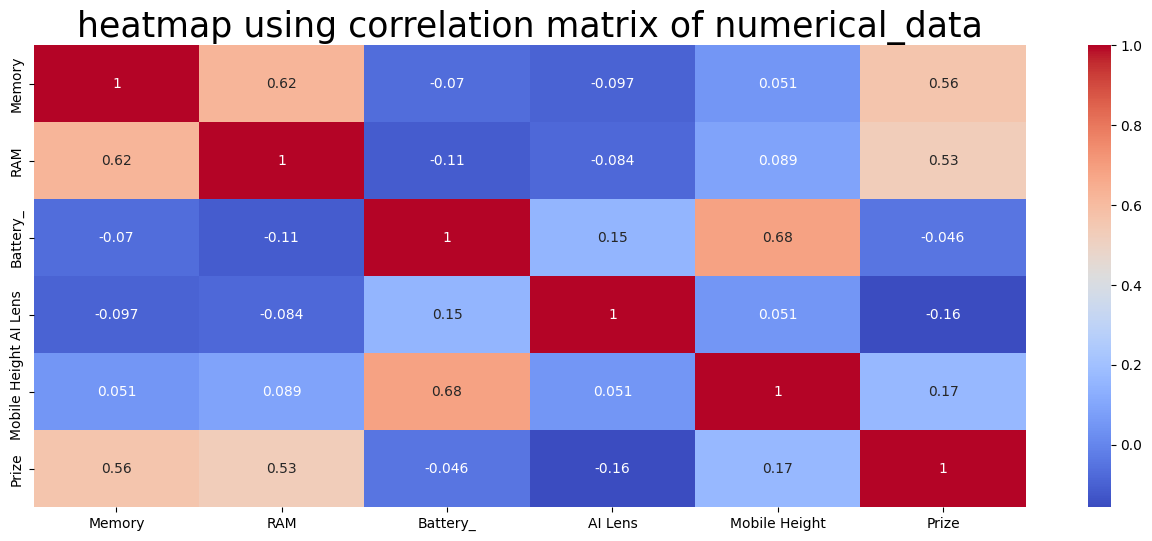

In [20]:

## heatmap using correlation matrix

plt.figure(figsize = (16,6)) # heatmap size in ration 16:9

sns.heatmap(numerical_df.corr(),annot = True , cmap = 'coolwarm')

plt.title("heatmap using correlation matrix of numerical_data",fontsize = 25)


<ipython-input-21-26eff80cdaf4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(numerical_df['Prize'])


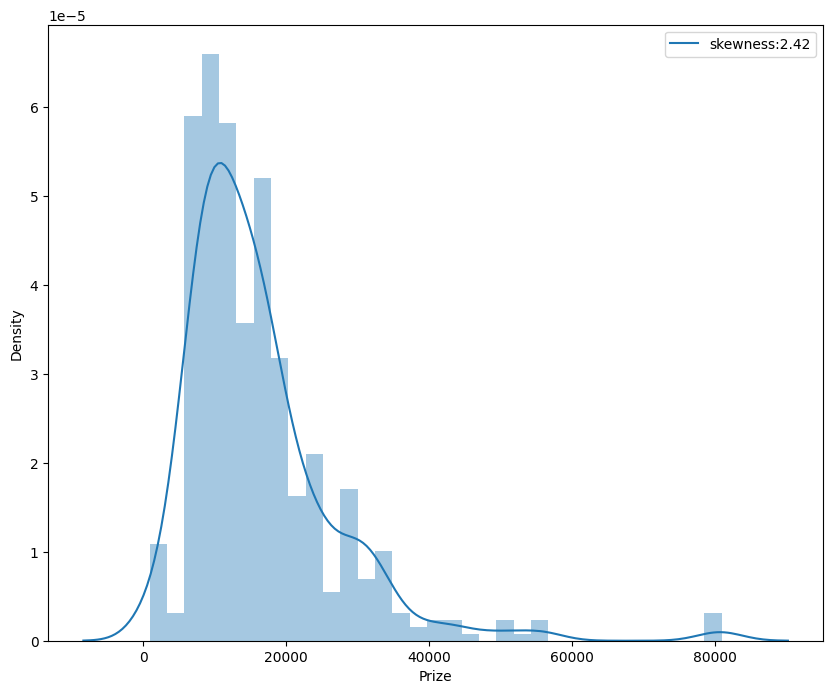

In [21]:
## plot displot of target

plt.figure(figsize = (10,8))

bar = sns.distplot(numerical_df['Prize'])

bar.legend(["skewness:{:.2f}".format(numerical_df['Prize'].skew())])

In [22]:

high_corr = numerical_df.corr()

high_corr_features = high_corr.index[abs(high_corr["Prize"]) >= 0.5]

high_corr_features

Index(['Memory', 'RAM', 'Prize'], dtype='object')

(3.5, -0.5)

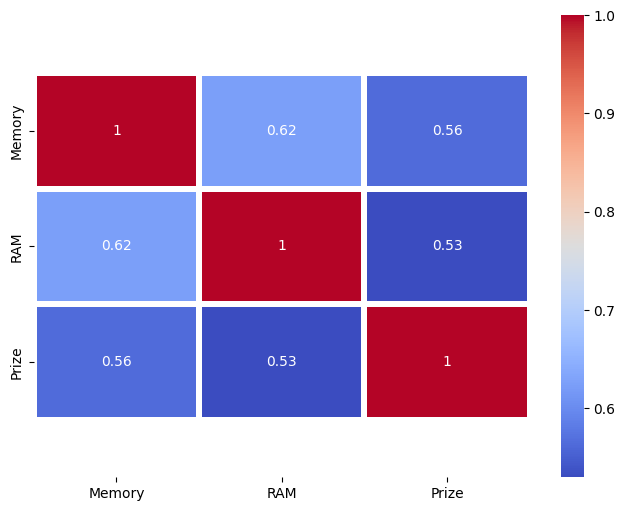

In [23]:
plt.figure(figsize=(8,6))

saleprice_high_corr = sns.heatmap(numerical_df[high_corr_features].corr(),cmap = 'coolwarm',annot = True,linewidth = 3)

bottom,top = saleprice_high_corr.get_ylim()

saleprice_high_corr.set_ylim(bottom + 0.5 , top - 0.5)

## Summary
The image is a heatmap showing the correlation between three variables: Memory, RAM, and Prize. The correlation values are color-coded, with red indicating higher correlation and blue indicating lower. The diagonal values are all 1, indicating perfect correlation with themselves. The off-diagonal values show the correlation between different variables:

Memory and RAM: 0.72

Memory and Prize: 0.77

RAM and Prize: 0.71

These values suggest there is a strong positive correlation between these variables.

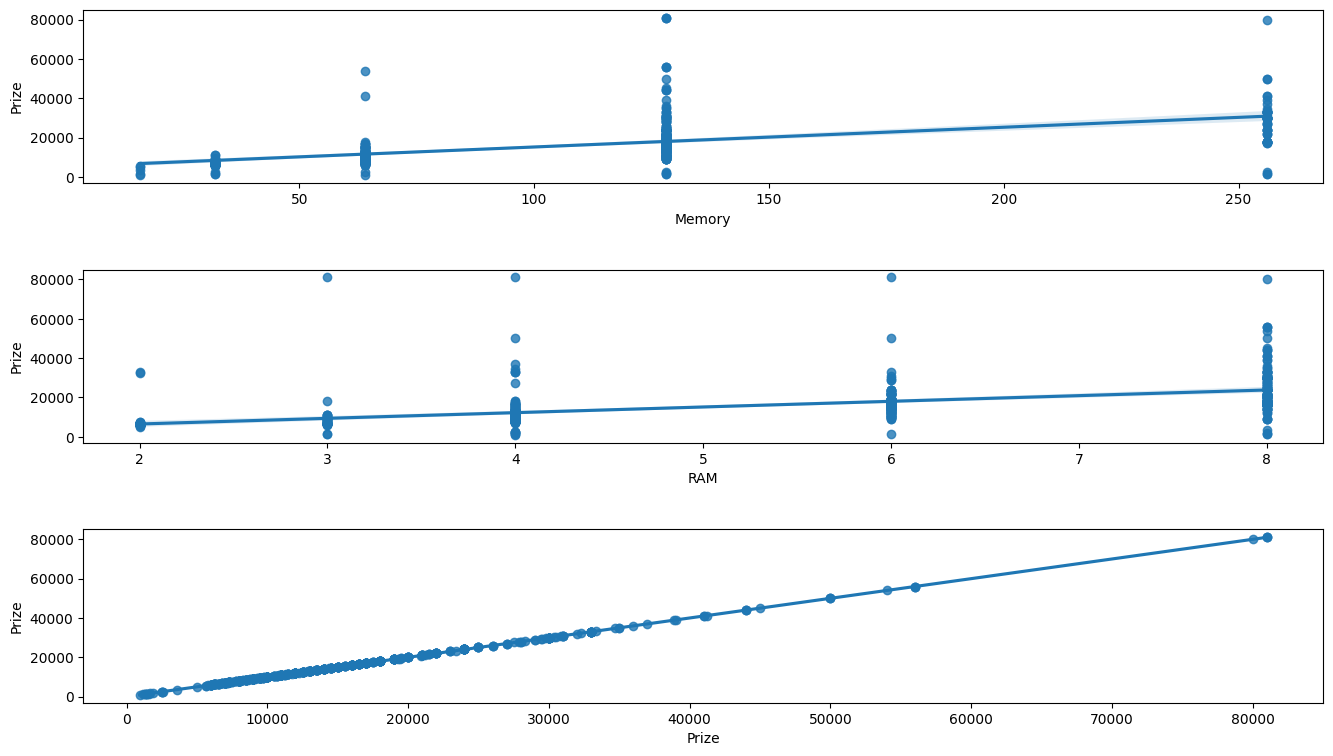

In [24]:
# plot regplot to get the nature of highly correlated data

plt.figure(figsize=(16,9))

for i in range(len(high_corr_features)):
  if i <= 3:
    plt.subplot(3,1,i+1)
    plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
    sns.regplot(data =numerical_df,x = high_corr_features[i],y = 'Prize')

# Histogram of each features of numerical_data

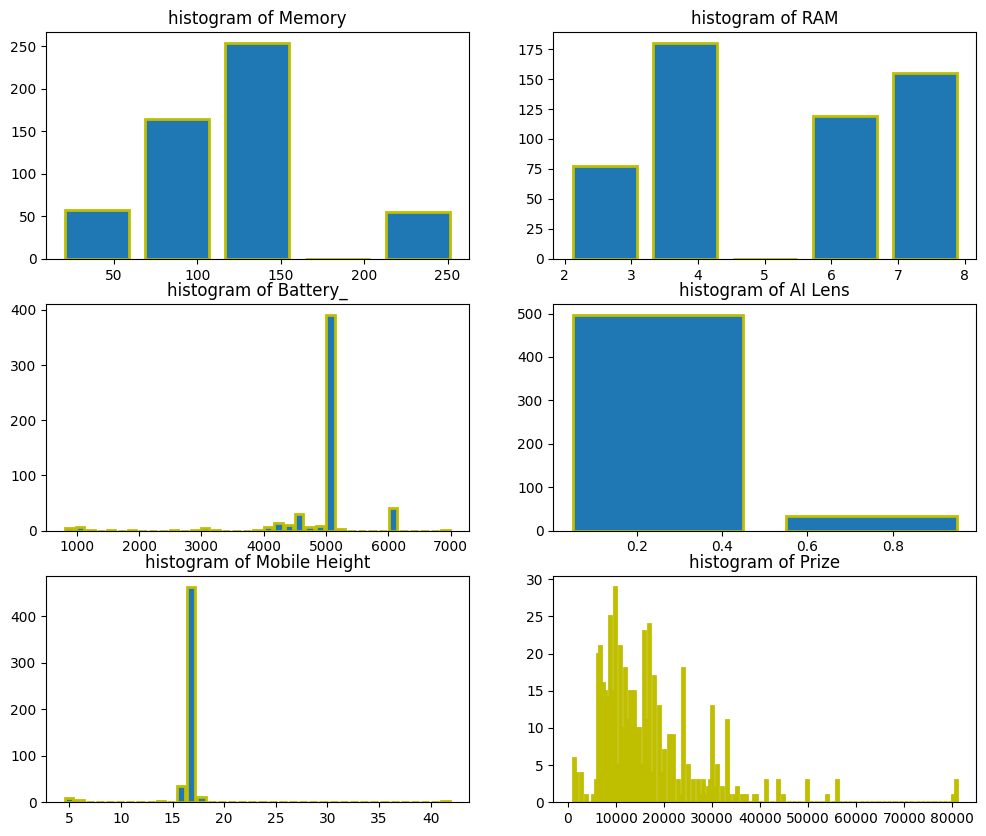

In [25]:
# plot histogram

plt.figure(figsize = (12,10))

features = numerical_df.columns
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.title("histogram of {}".format(features[i]),fontsize = 12)

  bins = len(numerical_df[features[i]].unique())
  plt.hist(numerical_df[features[i]],bins = bins,rwidth = 0.8,edgecolor = "y",linewidth = 2, )

## According to histogram plot observe few things.

1. Demand for 128GB of memory in mobile phone is high.
2. Demand for 4 GB RAM in mobile phone is high.
3. sales of around 5000 MAH batteries are in high demand.
4. There is a large amount phone manufacture in non-AI lenses.
5. There is a strong market for 16 to 18 inch size mobile phones
6. 9000 to 20000 mobile price is beneficial for greater sales,according to the
   graph

# Multivariate Analysis :

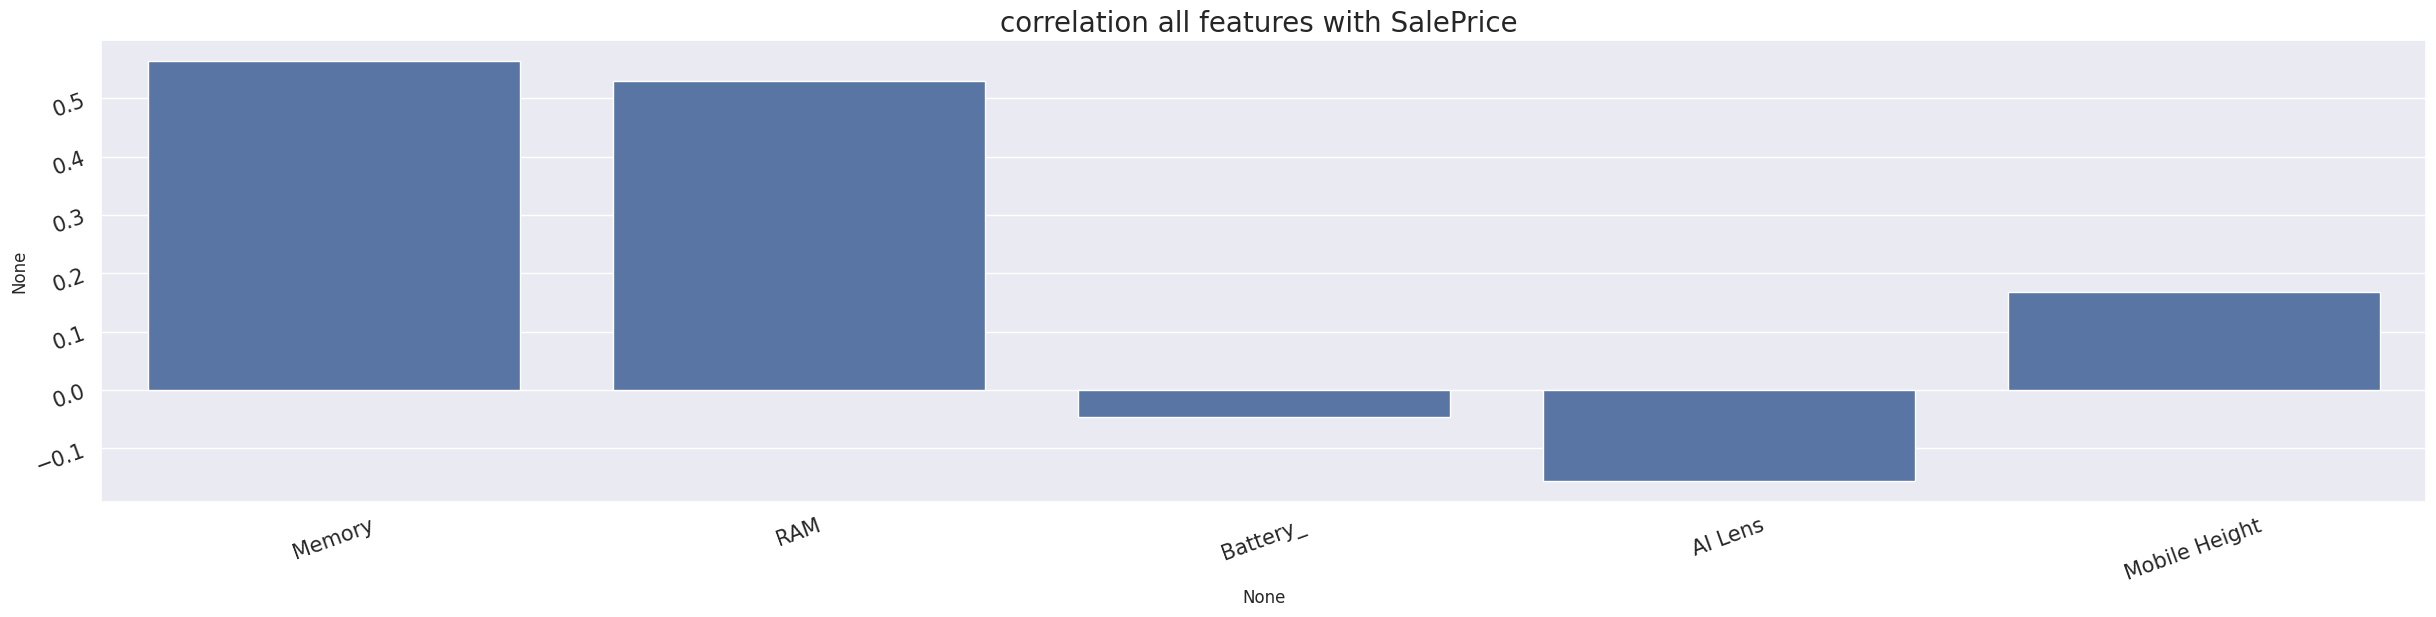

In [26]:
sns.set()
plt.figure(figsize = (30,6))
plt.title("correlation all features with SalePrice ",fontsize = 20)
saleprice_corr_data = numerical_df.drop(['Prize'],axis = 1) # drop 'SalePrice' features
ax = sns.barplot(x=saleprice_corr_data.columns, y=saleprice_corr_data.corrwith(numerical_df.Prize)) # plot barplot # plot barplot
ax.tick_params(labelsize = 15,labelrotation = 20,color = "k") # decorate x & y tick font

Memory: This feature has the highest correlation with sale price, with a correlation coefficient close to 0.8. This indicates that as the memory (internal storage) of the phone increases, the sale price tends to increase significantly.

RAM: This feature also has a strong positive correlation with sale price, with a correlation coefficient slightly lower than memory but still substantial. Higher RAM is associated with higher sale prices.

Battery_: This feature has a much lower correlation with sale price compared to memory and RAM, indicating that battery capacity is not as strong a predictor of sale price.

AI Lens: This feature has a minimal correlation with sale price, suggesting that the presence or quality of AI lenses does not significantly impact the sale price.

Mobile Height: This feature shows a low positive correlation with sale price, indicating a weak relationship between the physical height of the mobile phone and its sale price.

### In summary, the chart suggests that memory and RAM are the most important features affecting the sale price of mobile phones. Other features like battery capacity, AI lens, and mobile height have much less influence on the price. This information can be useful for feature selection in the model building process, focusing more on memory and RAM for price prediction.

 ## Explore Relationships Between Key Features and mobile Prices

### show relation between RAM vs. mobile SalePrice

<ipython-input-27-7aa5b417a809>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = {prize: plt.cm.get_cmap('viridis')(i/len(unique_prizes))


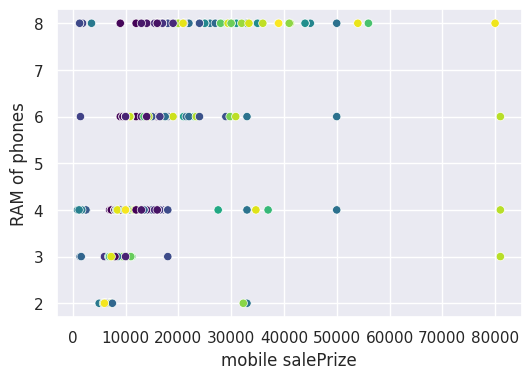

In [27]:
plt.figure(figsize=(6,4))
# Get unique values in the 'Prize' column
unique_prizes = numerical_df['Prize'].unique()

# Create a color mapping for all unique prizes
color = {prize: plt.cm.get_cmap('viridis')(i/len(unique_prizes))
         for i, prize in enumerate(unique_prizes)}

# Pass x and y as keyword arguments
sns.scatterplot(x=numerical_df['Prize'], y=numerical_df['RAM'], c=numerical_df['Prize'].apply(lambda x: color.get(x, 'gray')))
plt.xlabel('mobile salePrize')
plt.ylabel('RAM of phones')
# plt.xticks([2,3,4,6,8]) # Adjust xticks if needed based on unique prizes
plt.show()

### what we know according to this scatter plot.

### Axes:

X-axis: Represents the mobile phone sale prices, ranging from 5,000 to 30,000.

Y-axis: Represents the RAM of phones in gigabytes (GB), ranging from 2GB to 8GB.
### Patterns:
1. There seems to be a positive correlation between RAM and sale price: phones
   with more RAM generally tend to have higher sale prices.

2. Phones with the same amount of RAM can have varying sale prices, suggesting
   that other features besides RAM also influence the price.

### Distribution:

1. There is a noticeable clustering of phones with 2GB, 3GB, 4GB, 6GB, and 8GB
   of RAM.
2. Phones with lower RAM (2GB to 4GB) tend to have sale prices concentrated
   between 5,000 and 15,000.
3. Phones with higher RAM (6GB and 8GB) have sale prices that spread across a
   wider range, from around 10,000 to 30,000.


### Number of mobile phone Memory vs. mobile phones SalePrice

<ipython-input-28-0264c5066a6a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = {prize: plt.cm.get_cmap('viridis')(i/len(unique_prizes))


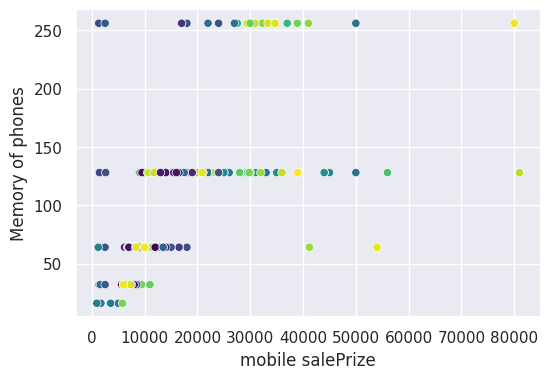

In [28]:
plt.figure(figsize=(6,4))
# Get unique values in the 'Prize' column
unique_prizes = numerical_df['Prize'].unique()

# Create a color mapping for all unique prizes
color = {prize: plt.cm.get_cmap('viridis')(i/len(unique_prizes))
         for i, prize in enumerate(unique_prizes)}

# Pass x and y as keyword arguments
sns.scatterplot(x=numerical_df['Prize'], y=numerical_df['Memory'], c=numerical_df['Prize'].apply(lambda x: color.get(x, 'gray')))
plt.xlabel('mobile salePrize')
plt.ylabel('Memory of phones')
# plt.xticks([2,3,4,6,8]) # Adjust xticks if needed based on unique prizes
plt.show()

### Axes:

X-axis: Represents the mobile phone sale prices, ranging from 5,000 to 30,000.

Y-axis: Represents the memory (internal storage) of phones in gigabytes (GB),
        ranging from approximately 32GB to 256GB.

#### Distribution:

1. There is a clustering of phones with memory sizes at 32GB, 64GB, 128GB,
   256GB, etc.
2. Phones with lower memory (32GB and 64GB) tend to have sale prices
   concentrated between 5,000 and 20,000.
3. Phones with higher memory (128GB and above) have sale prices that spread
   across a wider range, from around 10,000 to 30,000.

###Patterns:

There appears to be a positive correlation between memory and sale price:

--> phones with larger memory generally tend to have higher sale prices.

--> Phones with the same amount of memory can have varying sale prices,
  suggesting that other features besides memory also influence the price.

# Detect and remove outliers

In [29]:
data_no_duplicates.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,110.915254,5.401130,4873.877589,0.064030,16.450019,16305.775895
std,60.872883,1.991283,765.883129,0.245037,2.494246,10847.038354
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9368.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13999.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19338.500000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


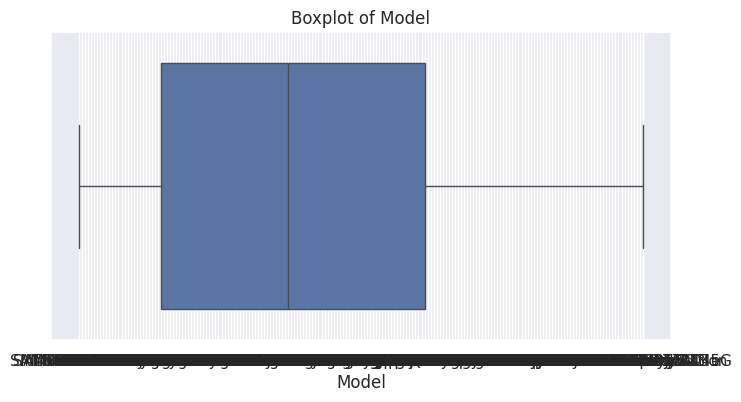

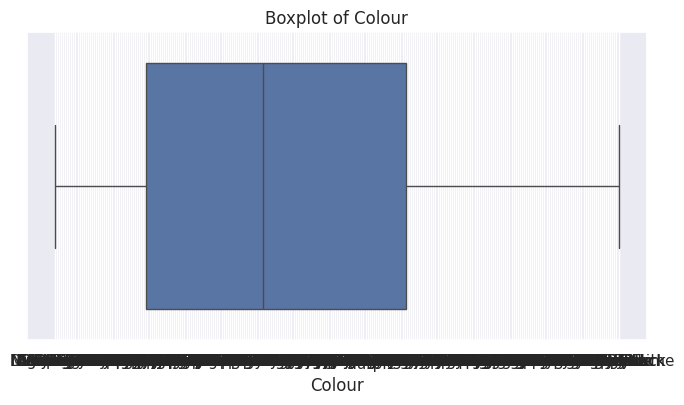

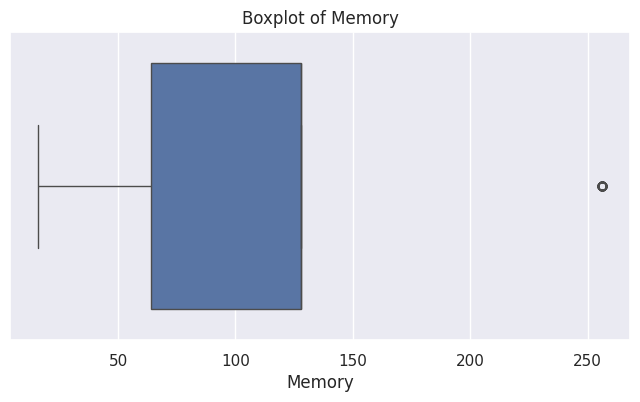

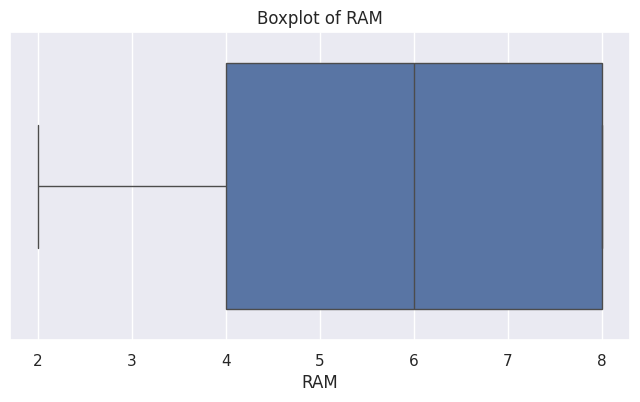

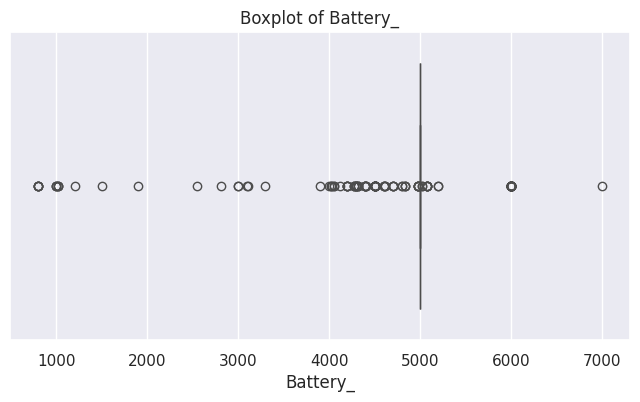

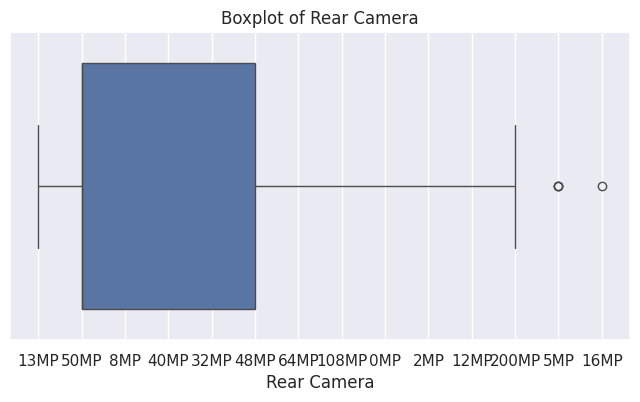

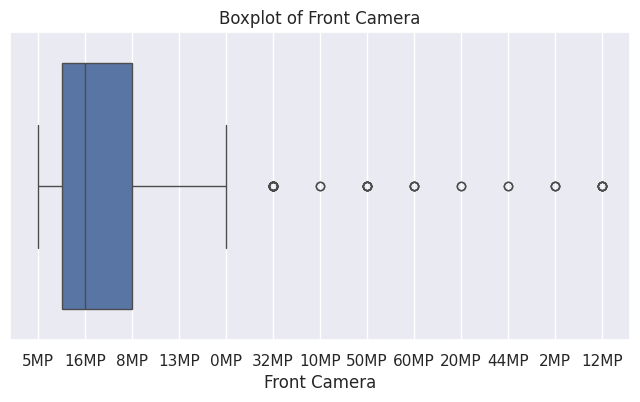

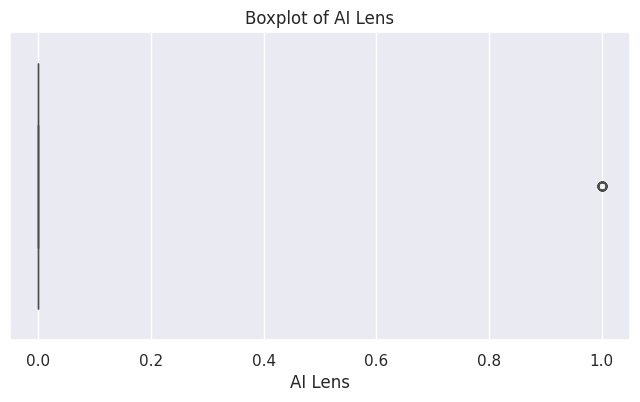

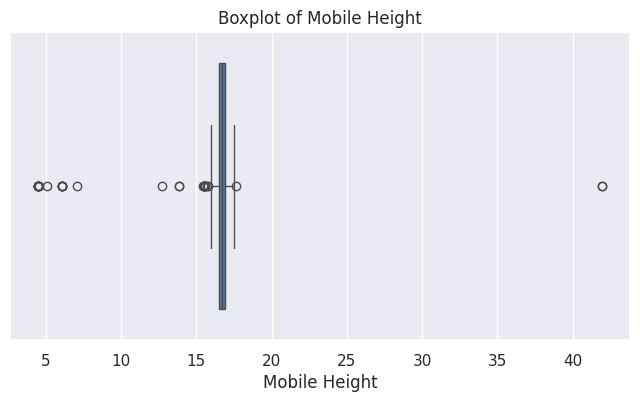

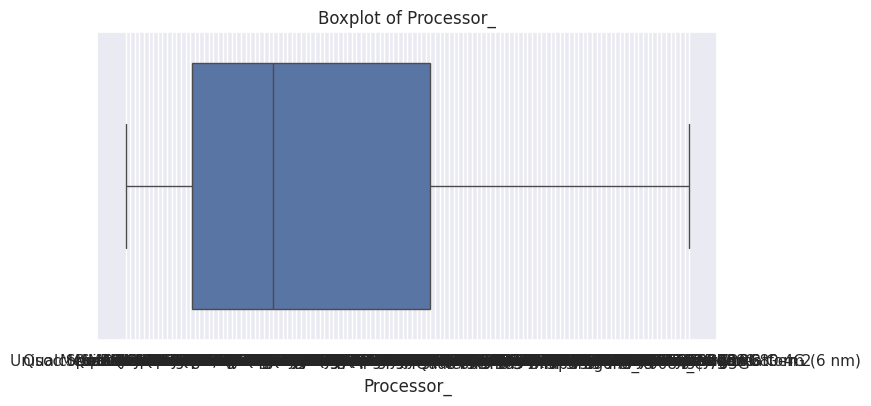

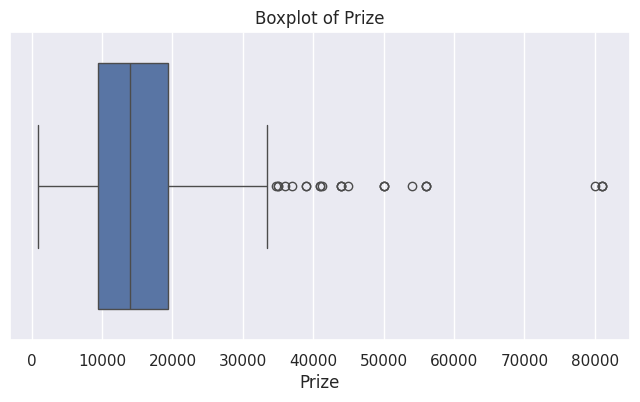

In [30]:
# Identify and visualize outliers for each column

for column in data_no_duplicates.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_no_duplicates[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [31]:
def remove_outliers(col):
  sorted(col)
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  l1 = q1-(1.5*iqr)
  u1 = q3+(1.5*iqr)
  return l1,u1

In [32]:
for i in data_no_duplicates[
  [
        'Memory',
        'RAM',
        'Prize'
  ]
]:
  if data_no_duplicates[i].dtype != 'object':
    l1,u1 = remove_outliers(data_no_duplicates[i])
    data_no_duplicates[i] = np.where(data_no_duplicates[i] > u1, u1, data_no_duplicates[i])
    data_no_duplicates[i] = np.where(data_no_duplicates[i] < l1, l1, data_no_duplicates[i])



<ipython-input-32-75919ee830b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates[i] = np.where(data_no_duplicates[i] > u1, u1, data_no_duplicates[i])
<ipython-input-32-75919ee830b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates[i] = np.where(data_no_duplicates[i] < l1, l1, data_no_duplicates[i])


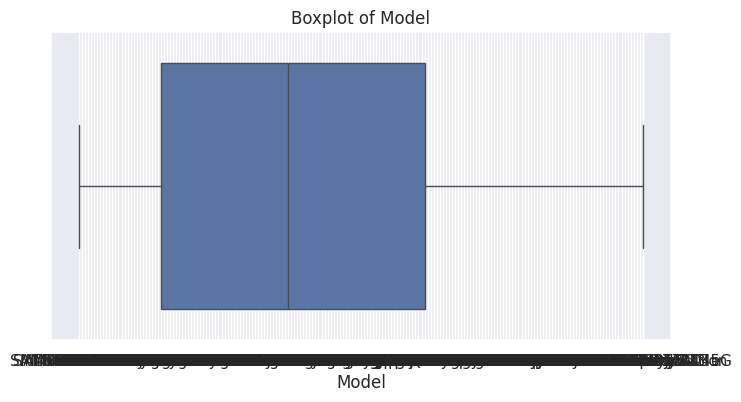

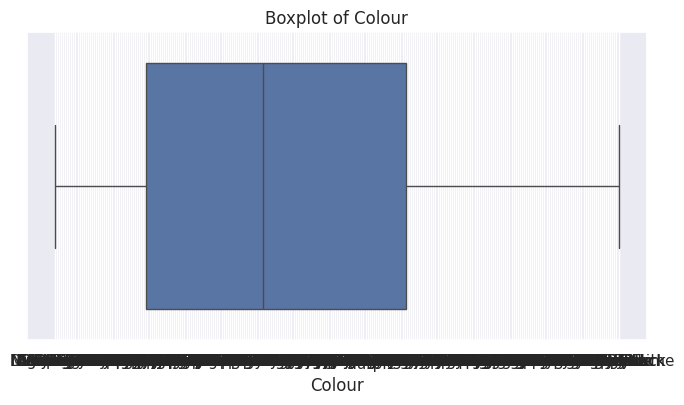

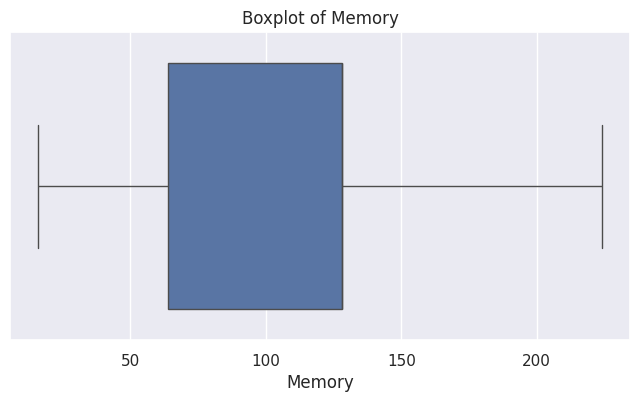

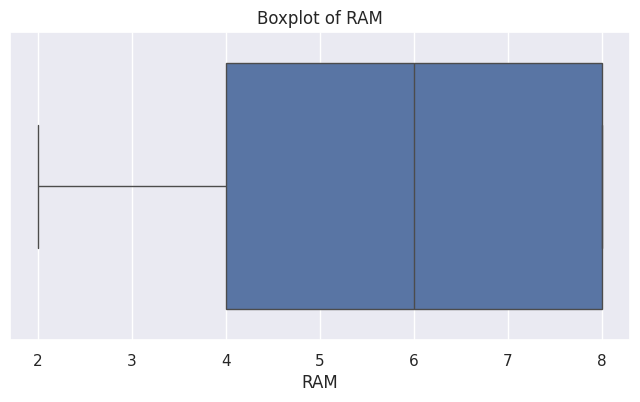

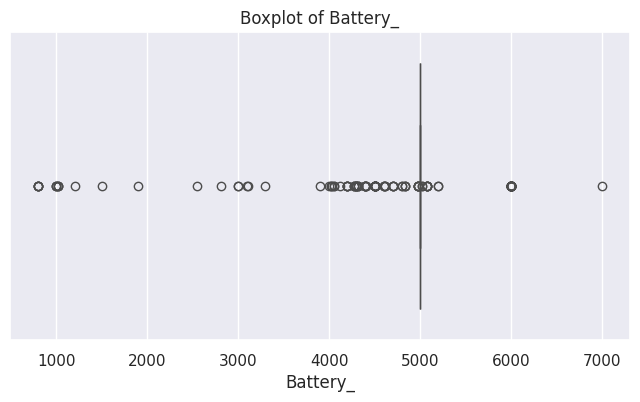

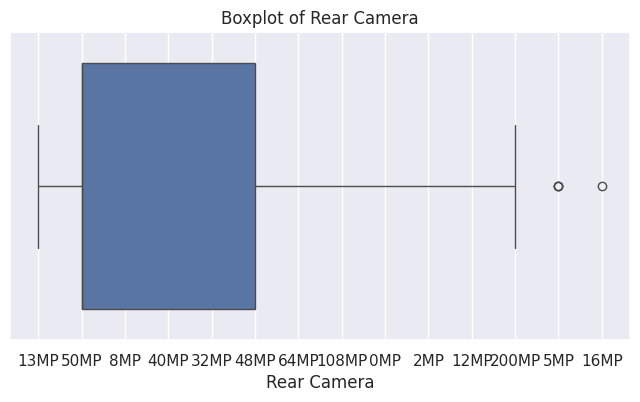

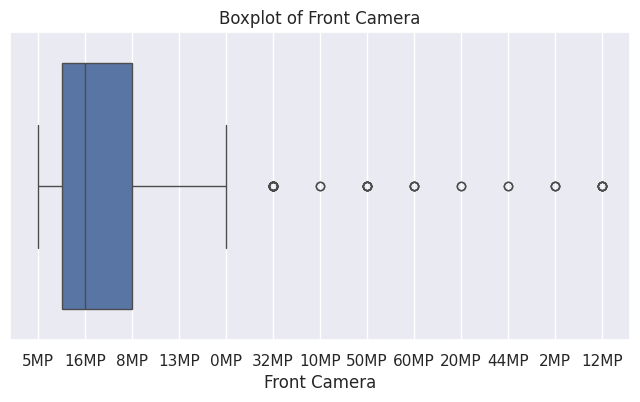

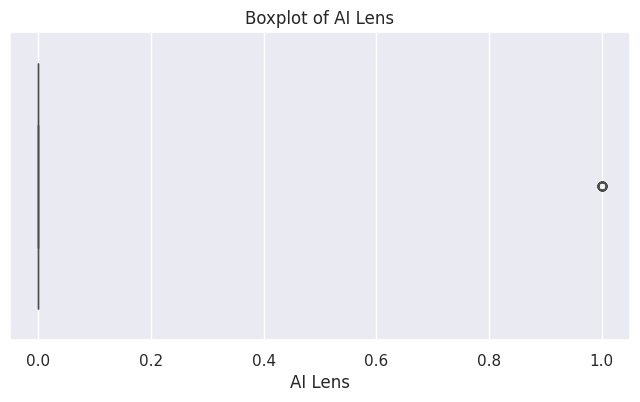

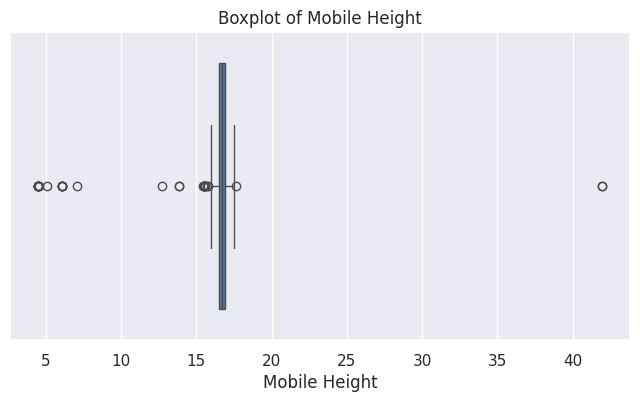

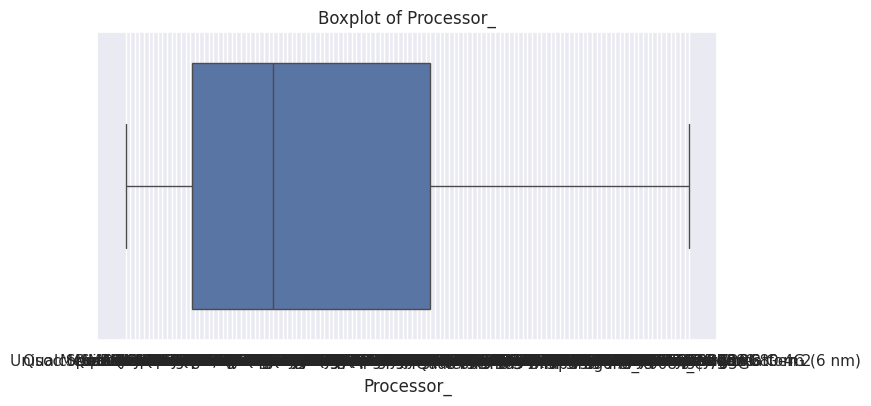

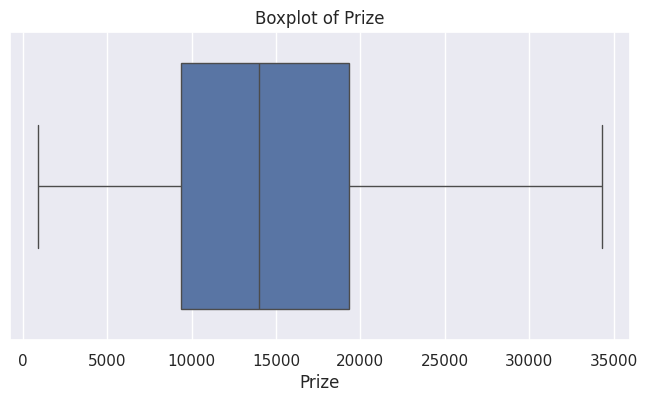

In [33]:
# Identify and visualize outliers for each column

for column in data_no_duplicates.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_no_duplicates[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#  Applying ONE-HOT Encoding to the columns whose variables are not in Numerical Formate

In [34]:
# Convert categorical variables to numerical format using one-hot encoding
# Identify categorical columns
categorical_columns = data_no_duplicates.select_dtypes(include=['object']).columns

# One-hot encoding
data_encoded = pd.get_dummies(data_no_duplicates, columns=categorical_columns,dtype=int)

print("First 5 rows of the preprocessed dataset:")
print(data_encoded.head())

print("\nShape of the preprocessed dataset:")
print(data_encoded.shape)

print("\nSummary statistics of the preprocessed dataset:")
print(data_encoded.describe(include='all'))

First 5 rows of the preprocessed dataset:
            Memory  RAM  Battery_  AI Lens  Mobile Height    Prize  \
Unnamed: 0                                                           
0             64.0  4.0      6000        1          16.76   7299.0   
1             64.0  4.0      6000        1          16.76   7299.0   
2            128.0  8.0      5000        0          16.64  11999.0   
3             32.0  2.0      5000        0          16.56   5649.0   
4            128.0  8.0      5000        1          16.76   8999.0   

            Model_APPLE iPhone 11  Model_APPLE iPhone 12  \
Unnamed: 0                                                 
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

            Model_APPLE iPhone 14 Plus  Model_

In [35]:
data_encoded.head()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,64.0,4.0,6000,1,16.76,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,64.0,4.0,6000,1,16.76,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,128.0,8.0,5000,0,16.64,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32.0,2.0,5000,0,16.56,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128.0,8.0,5000,1,16.76,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Importance using a Machine Learning Model

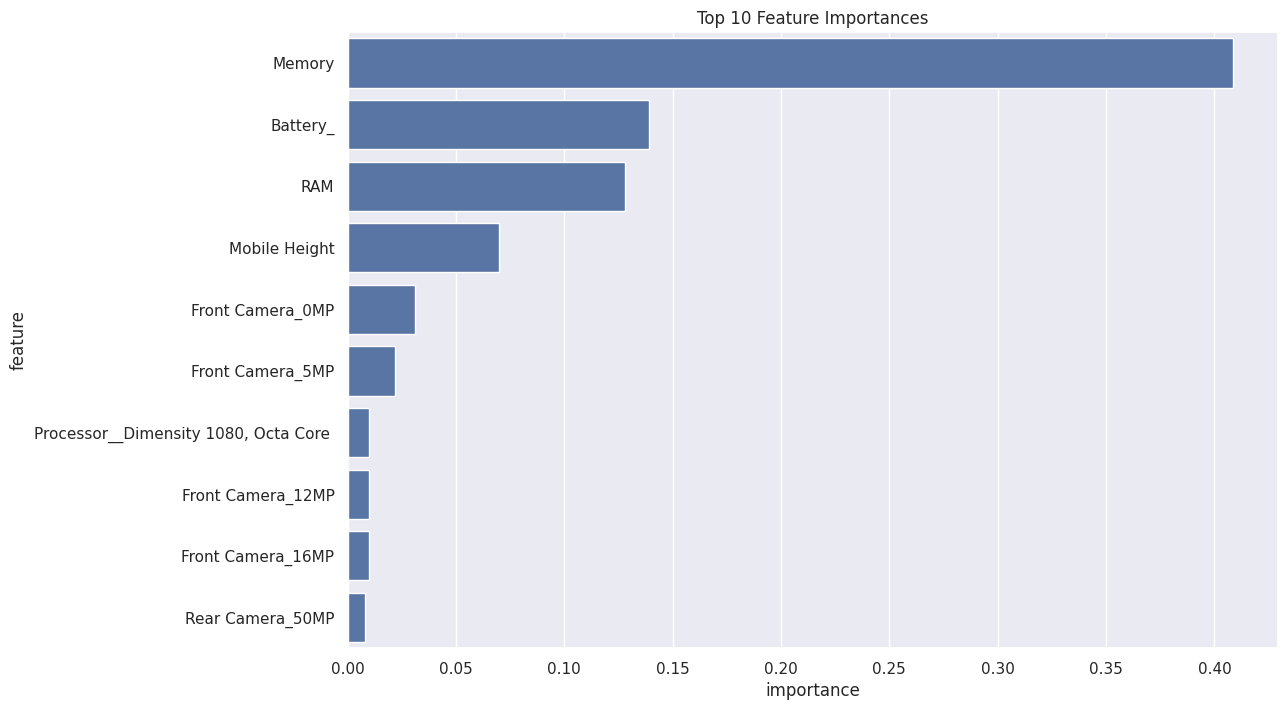

Top features based on Random Forest importance:
                                   feature  importance
0                                   Memory    0.408728
2                                 Battery_    0.139108
1                                      RAM    0.127910
4                            Mobile Height    0.070039
481                       Front Camera_0MP    0.030941
491                       Front Camera_5MP    0.021692
498  Processor__Dimensity 1080, Octa Core     0.010061
483                      Front Camera_12MP    0.010037
485                      Front Camera_16MP    0.009640
477                       Rear Camera_50MP    0.008215


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_encoded.drop(columns=['Prize'])
y = data_encoded['Prize']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))  # Adjust the number of features as needed
plt.title('Top 10 Feature Importances')
plt.show()

# Print top features
print("Top features based on Random Forest importance:")
print(feature_importances.head(10))

# Dimensionality Reduction Using PCA

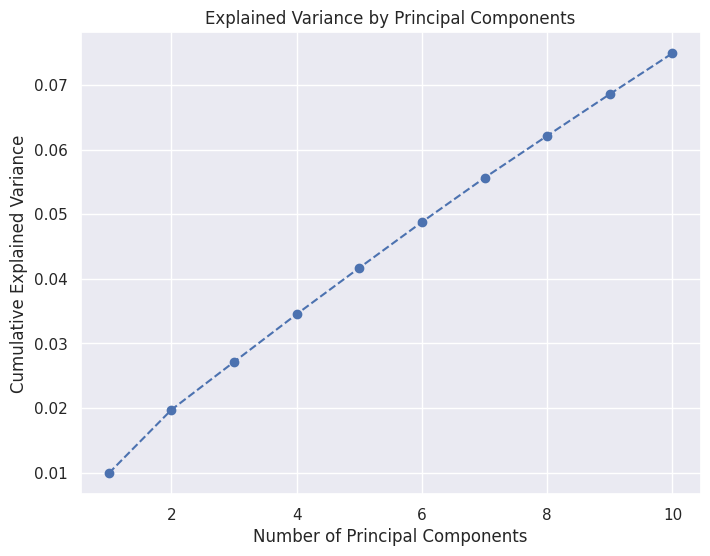

Explained variance ratio by each principal component:
[0.00992621 0.00982152 0.00740562 0.00738076 0.0071686  0.00708325
 0.00684757 0.00649726 0.00644685 0.00632246]


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Print explained variance ratio
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

# Train Test Split in Dataset

In [40]:
from sklearn.model_selection import train_test_split

# Assuming `data_encoded` is your preprocessed DataFrame
# Separate features and target variable
X = data_encoded.drop(columns=['Prize'])
y = data_encoded['Prize']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape,y_train.shape

((424, 617), (424,))

In [42]:
X_test.shape,y_test.shape

((107, 617), (107,))

# Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)

In [115]:
# Evaluate the model
r2_score_lr = lr.score(X_test, y_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

In [116]:
print(f"Linear Regression r2_score: {r2_score_lr}")
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression r2_score: 0.9040529266903758
Linear Regression MAE: 1310.4517482363444
Linear Regression RMSE: 2304.2683510832426


# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
# Train the Decision Tree model
dt = DecisionTreeRegressor(random_state=4)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=4)

In [119]:
# Predict on the test set
y_pred_dt = dt.predict(X_test)

In [120]:
# Evaluate the model
r2_score_dt = dt.score(X_test, y_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

In [121]:
print(f"Decision Tree r2_score: {r2_score_dt}")
print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")

Decision Tree r2_score: 0.9291238613207706
Decision Tree MAE: 936.9742990654206
Decision Tree RMSE: 1980.4651908275084


# Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [125]:
# Evaluate the model
r2_score_rf = rf.score(X_test, y_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [126]:
print(f"Random Forest r2_score: {r2_score_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest r2_score: 0.9189222282285108
Random Forest MAE: 1355.170971962617
Random Forest RMSE: 2118.2054993917036


# Summary of Model Performance

In [127]:
print("Model Performance Summary:")
print(f"Linear Regression r2_score: {r2_score_lr} , MAE: {mae_lr} , RMSE: {rmse_lr}")
print(f"Decision Tree r2_score: {r2_score_dt} , MAE: {mae_dt} , RMSE: {rmse_dt}")
print(f"Random Forest r2_score: {r2_score_rf} , MAE: {mae_rf} , RMSE: {rmse_rf}")

Model Performance Summary:
Linear Regression r2_score: 0.9040529266903758 , MAE: 1310.4517482363444 , RMSE: 2304.2683510832426
Decision Tree r2_score: 0.9291238613207706 , MAE: 936.9742990654206 , RMSE: 1980.4651908275084
Random Forest r2_score: 0.9189222282285108 , MAE: 1355.170971962617 , RMSE: 2118.2054993917036


# Visualizing the Results

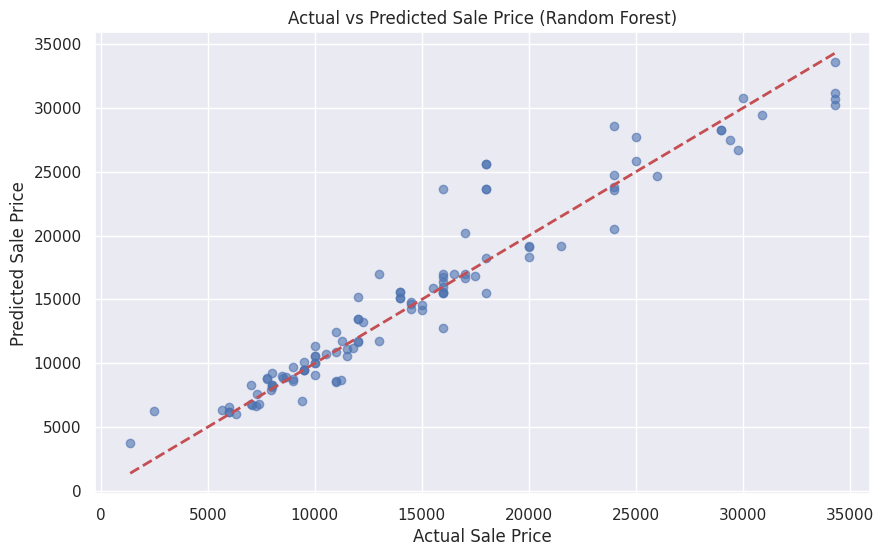

In [130]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
prd = rf.predict(X_test)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Price (Random Forest)')
plt.show()

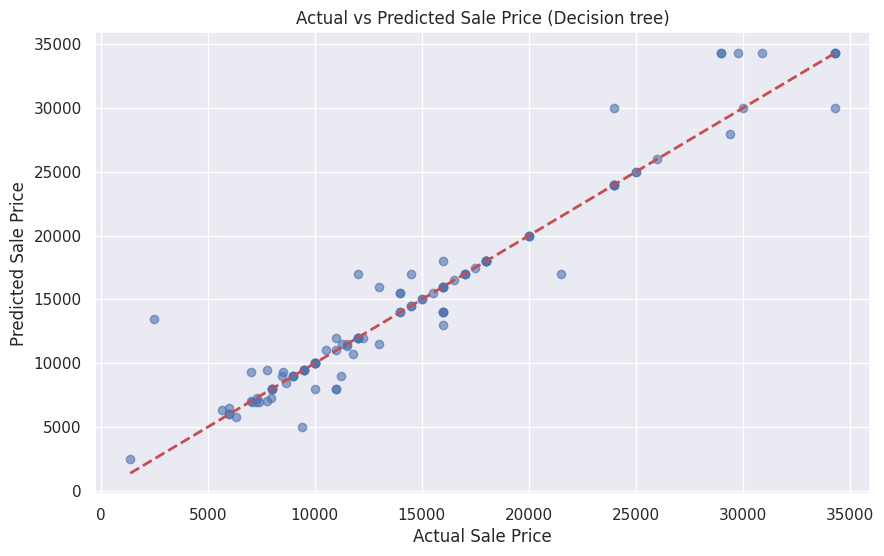

In [131]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
prd = rf.predict(X_test)
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='b')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Price (Decision tree)')
plt.show()

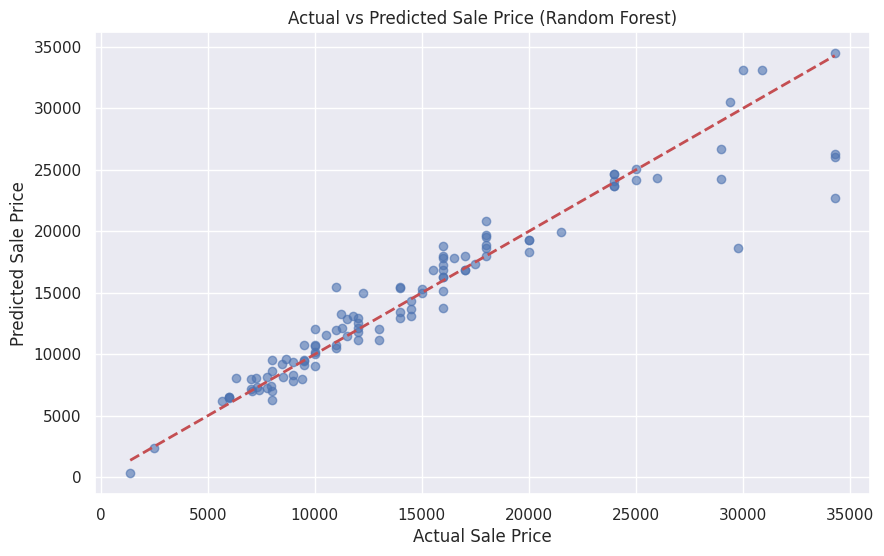

In [132]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
prd = rf.predict(X_test)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='b')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Sale Price (Random Forest)')
plt.show()